In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
data = pd.read_csv("../artifacts/sentiment_analysis.csv")

In [80]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## Data preprocessing

In [81]:
data.shape

(7920, 3)

In [82]:
data.duplicated().sum()

np.int64(0)

In [83]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

### text preprocessing

In [84]:
import re
import string

In [85]:
data["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

converting uppercase to lowercase

In [86]:
data["tweet"] = data["tweet"].apply(lambda x:" ".join(x.lower() for x in x.split()))

In [87]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

remove links

In [88]:
data["tweet"] = data["tweet"].apply(lambda x:" ".join(re.sub(r"^https?:\/\/.*[\r\n]*","",x,flags=re.MULTILINE) for x in x.split()))

In [89]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

Removing punctuation marks

In [90]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [91]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation,"")
    return text
data["tweet"] = data["tweet"].apply(remove_punctuations)

In [92]:
data["tweet"].head(5)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

removing numbers

In [93]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [94]:
data['tweet'] = data['tweet'].str.replace(r'\d+', '', regex=True)

In [95]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

removing stopwords

In [96]:
!pip install nltk

In [97]:
import nltk

In [98]:
nltk.download("stopwords",download_dir="../static/model")

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [99]:
with open('../static/model/corpora/stopwords/english','r') as file:
    sw = file.read().splitlines()

In [100]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [101]:
data["tweet"] = data["tweet"].apply(lambda x:" ".join(x.lower() for x in x.split()if x not in sw))

In [102]:
data['tweet'].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

Stemming

In [103]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [104]:
data["tweet"] = data["tweet"].apply(lambda x:" ".join(ps.stem(x) for x in x.split()))

In [105]:
data['tweet'].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [106]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


## Building vocabulary

In [107]:
from collections import Counter
vocab = Counter()

In [108]:
vocab.update(["java","python","python","c++"])

In [109]:
vocab

Counter({'python': 2, 'java': 1, 'c++': 1})

In [110]:
for sentence in data["tweet"]:
    vocab.update(sentence.split())

In [111]:
len(vocab)

15951

In [112]:
data.shape

(7920, 3)

In [113]:
tokens = [key for key in vocab if vocab[key]>10]

In [114]:
len(tokens)

1145

In [115]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    with open(filename, 'w', encoding="utf-8") as file:
        file.write(data)

save_vocabulary(tokens, '../static/model/vocabulary.txt')

### Divide dataset

In [116]:
X = data['tweet']
y = data['label']

In [117]:
!pip install scikit-learn

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [119]:
X_train

2451    rt pgrinteract playblackjack mania rush free i...
1781    code … mandala redbubbl freelanc iphonecas iph...
6524    phone decid send text sent minut later realli ...
799                 suck earphon month old use offic appl
6755    hey hot dude read littletokyo spiritpunk luxur...
                              ...                        
5774    u know u put phone airplan mode charg twice fa...
6395               new iphon sound terribl wait age aswel
291     anyon els troubl iphon updat take age run new ...
6863    yeaa im back haha goodnight night room smile n...
7171    today inner geek work love new appl watch seri...
Name: tweet, Length: 6336, dtype: object

In [120]:
X_test

3733    better safe sorri ps safeti game car belt funn...
7147    revis sun spot stefanmantha summer appl natur ...
5838    samsung £ need screen fuckyou ide rather lick ...
2137    samsung hour sale pro amazon india samsun sams...
4841    teast new cellphon boy xperiat soni oldpic hot...
                              ...                        
183     ran buy iphon charger middl night iphon charge...
6644    fun fact get new iphon cabl wet longer work ap...
7190    silenc mohito melon appl bacardi holiday sun s...
909     great choic streetfight mortalkombat gameofthr...
1433    first new phone sinc quit like thu farand real...
Name: tweet, Length: 1584, dtype: object

In [121]:
y_train

2451    0
1781    0
6524    1
799     1
6755    0
       ..
5774    0
6395    1
291     1
6863    0
7171    0
Name: label, Length: 6336, dtype: int64

### vectorization

In [122]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
        vectorized_lst.append(sentence_lst)

    vectorized_lst_new = np.asarray(vectorized_lst,dtype=np.float32)

    return vectorized_lst_new
    

In [123]:
vectorized_x_train = vectorizer(X_train, tokens)

In [124]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [125]:
vectorized_x_test = vectorizer(X_test, tokens)

In [126]:
y_train

2451    0
1781    0
6524    1
799     1
6755    0
       ..
5774    0
6395    1
291     1
6863    0
7171    0
Name: label, Length: 6336, dtype: int64

In [127]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [128]:
y_test

3733    0
7147    0
5838    1
2137    0
4841    0
       ..
183     1
6644    1
7190    0
909     0
1433    0
Name: label, Length: 1584, dtype: int64

In [129]:
y_train.value_counts()

label
0    4710
1    1626
Name: count, dtype: int64

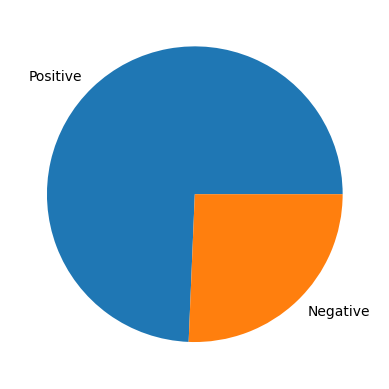

In [130]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive','Negative'])
plt.show()

### Handling imbalanced dataset

In [131]:
!pip install imbalanced_learn

In [132]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9420, 1145) (9420,)


In [133]:
y_train_smote.value_counts()

label
0    4710
1    4710
Name: count, dtype: int64

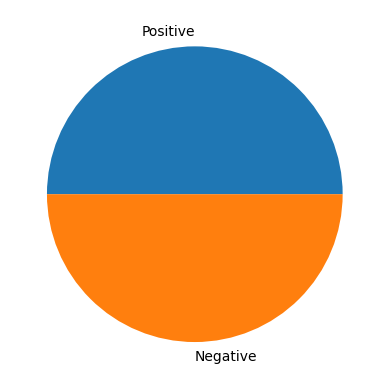

In [134]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive','Negative'])
plt.show()

In [135]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [136]:
y_train_smote

0       0
1       0
2       1
3       1
4       0
       ..
9415    1
9416    1
9417    1
9418    1
9419    1
Name: label, Length: 9420, dtype: int64

In [137]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [138]:
y_test

3733    0
7147    0
5838    1
2137    0
4841    0
       ..
183     1
6644    1
7190    0
909     0
1433    0
Name: label, Length: 1584, dtype: int64

## Model Trainning and Evaluation

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [140]:
from sklearn.metrics import accuracy_score, f1_score,precision_score,recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act,y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act,y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act,y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act,y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

## Logistic Regression

In [141]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 0.937
	Precision = 0.913
	Recall = 0.966
	F1-Score = 0.939
Training Scores:
	Accuracy = 0.882
	Precision = 0.725
	Recall = 0.858
	F1-Score = 0.786


In [142]:
y_train_smote

0       0
1       0
2       1
3       1
4       0
       ..
9415    1
9416    1
9417    1
9418    1
9419    1
Name: label, Length: 9420, dtype: int64

In [143]:
training_scores(y_train_smote, y_train_pred)

Training Scores:
	Accuracy = 0.937
	Precision = 0.913
	Recall = 0.966
	F1-Score = 0.939


### Naive Bayes

In [144]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 0.903
	Precision = 0.869
	Recall = 0.949
	F1-Score = 0.907
Training Scores:
	Accuracy = 0.872
	Precision = 0.679
	Recall = 0.94
	F1-Score = 0.788


### Decision Tree

In [145]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test,y_test_pred) 

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Training Scores:
	Accuracy = 0.833
	Precision = 0.667
	Recall = 0.672
	F1-Score = 0.67


### Random Forest

In [146]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test,y_test_pred) 

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Training Scores:
	Accuracy = 0.864
	Precision = 0.742
	Recall = 0.71
	F1-Score = 0.725


### Support Vector

In [147]:
svm = SVC()
svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test,y_test_pred) 

Training Scores:
	Accuracy = 0.977
	Precision = 0.961
	Recall = 0.995
	F1-Score = 0.978
Training Scores:
	Accuracy = 0.889
	Precision = 0.753
	Recall = 0.832
	F1-Score = 0.791


In [148]:
import pickle

with open('../static/model/model.pickle',"wb") as file:
    pickle.dump(lr, file)

In [149]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt